In [1]:
import pandas as pd, numpy as np, glob
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ric8path = '../GENES/B3502_B1/CNF04940-t26_1.csv.gz'
ric8 = pd.read_csv(ric8path)
ric8.tail()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample
1795,1438863,A,A,0,-1,5,-1,CNF04940-t26_1,B3502_B1
1796,1438864,C,C,0,-1,5,-1,CNF04940-t26_1,B3502_B1
1797,1438865,T,T,0,-1,5,-1,CNF04940-t26_1,B3502_B1
1798,1438866,C,C,0,-1,5,-1,CNF04940-t26_1,B3502_B1
1799,1438867,T,T,0,-1,5,-1,CNF04940-t26_1,B3502_B1


In [3]:
if ric8.Strand.max()<0:
    ric8 = ric8[::-1]
    
ric8['Zeropos'] = np.abs(ric8.Pos - ric8.Pos.tolist()[0])+1
ric8['Isvar'] = 0
ric8.loc[(ric8.Ref!=ric8.Alt),'Isvar']=1

ric8.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
1799,1438867,T,T,0,-1,5,-1,CNF04940-t26_1,B3502_B1,1
1798,1438866,C,C,0,-1,5,-1,CNF04940-t26_1,B3502_B1,2
1797,1438865,T,T,0,-1,5,-1,CNF04940-t26_1,B3502_B1,3
1796,1438864,C,C,0,-1,5,-1,CNF04940-t26_1,B3502_B1,4
1795,1438863,A,A,0,-1,5,-1,CNF04940-t26_1,B3502_B1,5


In [4]:
ref = Seq(''.join(ric8[(ric8.Type==0)].Ref.tolist()))
refaa = ref.complement().translate() if ric8.Strand.min()==-1 else ref.translate()
list(refaa).count('*'),len(refaa)

(1, 527)

In [7]:
alt = Seq(''.join(ric8[(ric8.Type==0)].Alt.tolist()))
altaa = alt.complement().translate() if ric8.Strand.min()==-1 else alt.translate()
list(altaa).count('*'),len(altaa)

(1, 527)

In [8]:
difix = np.min([i for i,j in enumerate(refaa) if j != altaa[i]])
difix

119

In [9]:
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('IRQDGF'), Seq('IRQEGF'))

In [10]:
snpdf = ric8[(ric8.Isvar!=0)]
snpdf

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
1395,1438463,G,A,1,-1,0,0,CNF04940-t26_1,B3502_B1,405
1350,1438418,G,C,1,-1,0,0,CNF04940-t26_1,B3502_B1,450
1320,1438388,T,A,1,-1,0,0,CNF04940-t26_1,B3502_B1,480
1305,1438373,T,C,1,-1,0,0,CNF04940-t26_1,B3502_B1,495
1182,1438250,C,T,1,-1,0,0,CNF04940-t26_1,B3502_B1,618
846,1437914,A,G,1,-1,0,0,CNF04940-t26_1,B3502_B1,954
768,1437836,G,A,1,-1,0,0,CNF04940-t26_1,B3502_B1,1032
684,1437752,T,G,1,-1,0,0,CNF04940-t26_1,B3502_B1,1116
576,1437644,G,A,1,-1,0,0,CNF04940-t26_1,B3502_B1,1224
555,1437623,G,A,1,-1,0,0,CNF04940-t26_1,B3502_B1,1245


In [11]:
cds = ric8[(ric8.Type==0)].copy()
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [12]:
cds[(cds.Refaa!=cds.Altaa)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1352,1438420,C,C,0,-1,0,0,CNF04940-t26_1,B3502_B1,448,D,E
1351,1438419,T,T,0,-1,0,0,CNF04940-t26_1,B3502_B1,449,D,E
1350,1438418,G,C,1,-1,0,0,CNF04940-t26_1,B3502_B1,450,D,E


In [21]:
to_plot = cds[(cds.Zeropos>= 448 - (3*4)) & 
              (cds.Zeropos<= 447 + (3*2)) ]
to_plot.tail()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1351,1438419,T,T,0,-1,0,0,CNF04940-t26_1,B3502_B1,449,D,E
1350,1438418,G,C,1,-1,0,0,CNF04940-t26_1,B3502_B1,450,D,E
1349,1438417,C,C,0,-1,0,0,CNF04940-t26_1,B3502_B1,451,G,G
1348,1438416,C,C,0,-1,0,0,CNF04940-t26_1,B3502_B1,452,G,G
1347,1438415,G,G,0,-1,0,0,CNF04940-t26_1,B3502_B1,453,G,G


In [22]:
aapath = '/home/croth/crypto-QTL-paper/DATA/AA_color_df.csv.gz'
aadf = pd.read_csv(aapath,index_col=0).T
aadf[18] = ['K','tab:blue']
aadf = aadf.T
aadf.tail()

,AA,Color
14,S,#1881DD
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,K,tab:blue


In [42]:
causal = to_plot[(to_plot.Refaa!=to_plot.Altaa) & 
                 (to_plot.Ref!=to_plot.Alt)].Zeropos.min()

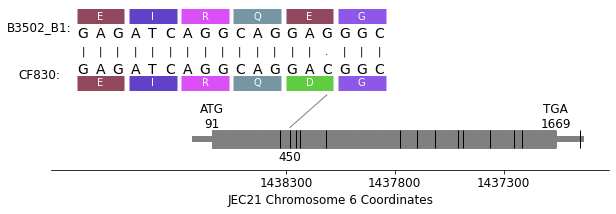

In [55]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')
## Plot gene body
plt.hlines(0,ric8.Zeropos.min(),ric8.Zeropos.max(),
           color='grey',linewidth=6);

## Plot introns
#cds = ric8[(ric8.Type==0)]
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',
               alpha=1,linewidth=1)
    
## Plot variants  
gvs = ric8[(ric8.Isvar==1)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,-1,1,
                   color='k',linewidth=1)
        
## Plot sequences        
x = -500
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 80
xpad = 30

plotpos = []
difpos = []
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    xp = x+(i*tw)
    plotpos.append(xp)
    plt.text(xp,y=y1+ys,s=Seq(p.Ref).complement(),
             fontsize=14,
             color='k',
             va='top',ha='center')
    
    plt.text(xp,y=y2+ys,s=Seq(p.Alt).complement(),
             fontsize=14,
             color='k',
             va='bottom',ha='center')
    
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02,
             s='|' if p.Alt==p.Ref else '.',
             fontsize=10,
             color='k',
             va='center',ha='center')
    if p.Alt!=p.Ref:
        difpos.append(xp)
    
for i,a in enumerate(to_plot.Refaa.tolist()[::3]):

    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,
             color='w',va='center',ha='center')
    
for i,a in enumerate(to_plot.Altaa.tolist()[::3]):

    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a if a != '*' else 'STOP',
             color='w',va='center',ha='center')
    
x_xp,x_xl = plt.xticks()

pos = ric8[(ric8.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=ric8.Zeropos.max())]))].Pos.values
zeropos = ric8[(ric8.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=ric8.Zeropos.max())]))].Zeropos.values

newxmod = int(str(pos[0])[-2:])

plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('JEC21 Chromosome 6 Coordinates',fontsize=12)

plt.text(cds.Zeropos.min()+1,2.5,
         'ATG\n%s'%cds.Zeropos.min(),
         va='center',ha='center',fontsize=12)

plt.text(cds.Zeropos.max()-1,2.5,
         'TGA\n%s'%str(cds.Zeropos.max()-2),
         va='center',ha='center',fontsize=12)

plt.ylim(-3.5,15);
## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]
plt.yticks([])

plt.text(x-(200),y1,'CF830:',fontsize=12,va='top',ha='center')
plt.text(x-(200),y2+1.5,'B3502_B1:',fontsize=12,va='bottom',ha='center')

plt.text(causal,-2,'%s'%causal,va='center',ha='center',fontsize=12)

plt.plot([causal,np.min(difpos)],[1.3,y1-3],color='k',alpha=0.5,linewidth=1)

fig.set_facecolor('w')
plt.savefig('../FIGURES/CNF04940_B3502_B1.png',
                    dpi=200,bbox_inches='tight');

In [46]:
assert np.max([np.unique([len(a) for a in ric8.Ref]),
               np.unique([len(a) for a in ric8.Alt])])==1

In [50]:
ric8[(ric8.Zeropos==causal)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
1350,1438418,G,C,1,-1,0,0,CNF04940-t26_1,B3502_B1,450


In [53]:
ric8.Pos.min(),ric8.Pos.max()

(1437068, 1438867)